<a href="https://colab.research.google.com/github/katoyu/constellation-detect/blob/master/constellation_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

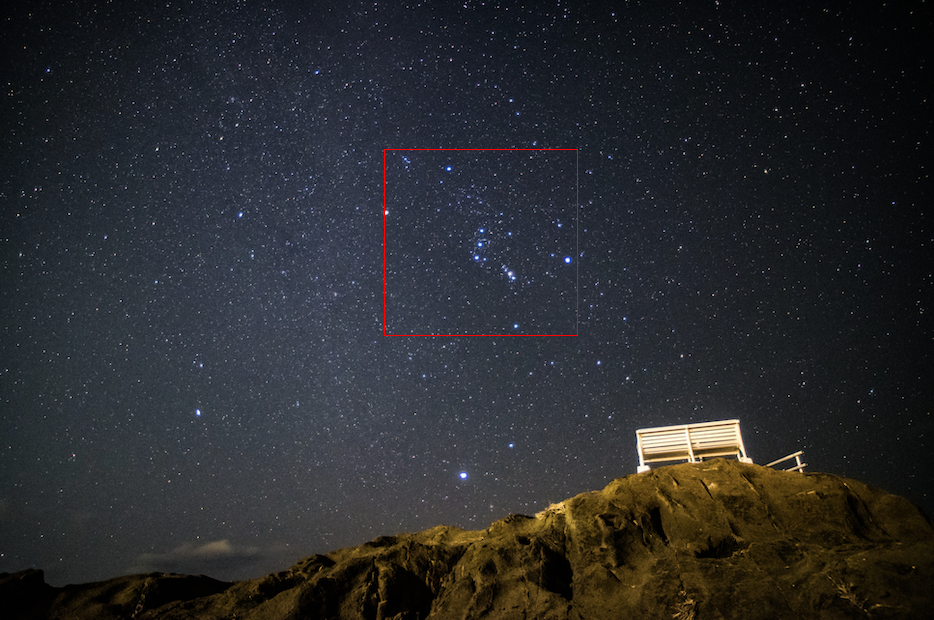

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#本画像
img = cv2.imread("image1.png").astype(np.float32)
#一部切り抜き画像
img2 = cv2.imread("image2.png").astype(np.float32)

H ,W, C = img.shape
Ht, Wt, Ct = img2.shape


#ラスタライズ走査を行う

i, j = -1, -1
v = 255 * H * W * C
for y in range(H-Ht):
    for x in range(W-Wt):
        _v = np.sum((img[y:y+Ht, x:x+Wt] - img2) ** 2)
        if _v < v:
            v = _v
            i, j = x, y


out = img.copy()
cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
out = out.astype(np.uint8)

cv2_imshow(out)



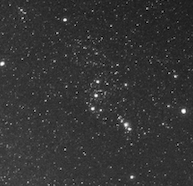

In [5]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

cv2_imshow(img2_gray)

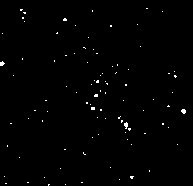

In [7]:
th = 127
img2_bi = img2_gray.copy()
img2_bi[img2_bi > th] = 255
img2_bi[img2_bi < th] = 0

cv2_imshow(img2_bi)

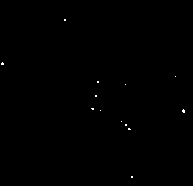

In [8]:
th = 200
img2_bi2 = img2_gray.copy()
img2_bi2[img2_bi2 > th] = 255
img2_bi2[img2_bi2 < th] = 0

cv2_imshow(img2_bi2)